# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
data = pd.read_csv("weight-height.csv")
male_df =  data.loc[data["Gender"] == "Male"]
female_df =  data.loc[data["Gender"] == "Female"]

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
print("Male Height mean:", male_df.Height.mean())
print("Male Height sd:", male_df.Height.std())

# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
print("Male Weight mean:", male_df.Weight.mean())
print("Male Weight sd:", male_df.Weight.std())

# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
print("Female Height mean:", female_df.Height.mean())
print("Female Height sd:", female_df.Height.std())

# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
print("Female Weight mean:", female_df.Weight.mean())
print("Female Weight sd:", female_df.Weight.std())

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

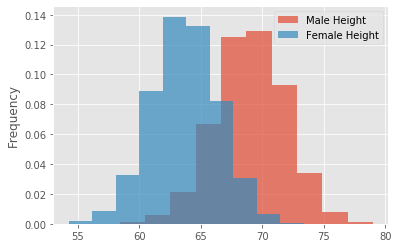

In [3]:
# Your code here
binsize = 10
male_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label="Male Height")
female_df.Height.plot.hist(bins=binsize, density=True, alpha=0.7, label="Female Height")
plt.legend()
plt.show()

In [4]:
# Record your observations - are these inline with your personal observations?
# The data represents normal distributions for both male and female heights.
# The data represents a higher mean male height than the mean female height.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

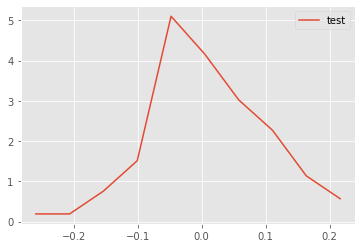

In [5]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

C:\Users\Duck\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
C:\Users\Duck\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


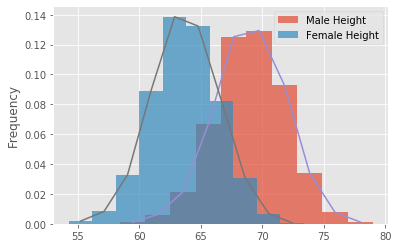

In [6]:
# Your code here 
male_df.Height.plot.hist(bins=binsize, normed=True, alpha=0.7, label="Male Height")
female_df.Height.plot.hist(bins=binsize, normed=True, alpha=0.7, label="Female Height")
plt.legend()

xmh,ymh = density(male_df.Height)
plt.plot(xmh,ymh)

xfh,yfh = density(female_df.Height)
plt.plot(xfh,yfh)

plt.show()

## Repeat the above exercise for male and female weights

C:\Users\Duck\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


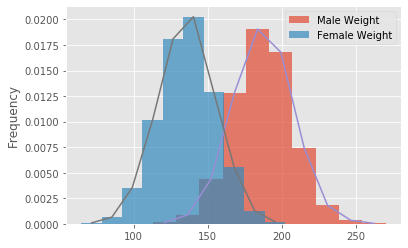

In [7]:
# Your code here 
male_df.Weight.plot.hist(bins=binsize, normed=True, alpha=0.7, label="Male Weight")
female_df.Weight.plot.hist(bins=binsize, normed=True, alpha=0.7, label="Female Weight")
plt.legend()

xmw,ymw = density(male_df.Weight)
plt.plot(xmw,ymw)

xfw,yfw = density(female_df.Weight)
plt.plot(xfw,yfw)

plt.show()

## Write your observations in the cell below

In [8]:
# Record your observations - are these inline with your personal observations?
# The data represents normal distributions for both male and female weights.
# The data represents a higher mean male weight than the mean female weight.

# What is the takeaway when comparing male and female heights and weights?
# Male and female height and weight relationships are similar, but weight
# data presents less overlap.

## Repeat the above experiments in seaborn and compare with your results

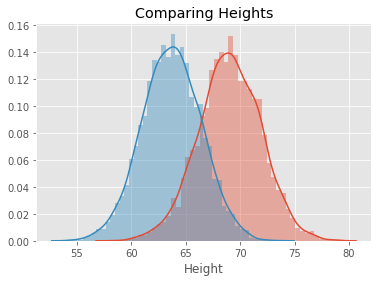

In [9]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title("Comparing Heights")
plt.show()

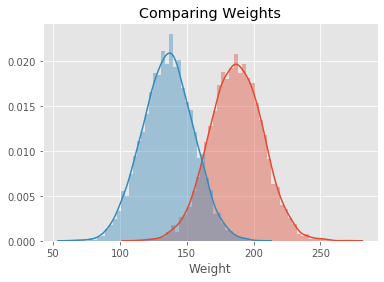

In [10]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title("Comparing Weights")
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# The two approaches provided similar results with the exception of binning.
# Seaborn, with its built-in processes, was able to provided the results with less code.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.